In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
fulldata = pd.read_csv("train_complete_data.csv")
fulldata.drop('Unnamed: 0', axis=1, inplace=True)
fulldata.rename(columns={'性别': 'sex', '年龄':'age', 'MRI扫描仪类型':'type'}, inplace=True)
fulldata['type'] = fulldata['type'].replace({'GE': 0, 'SIEMENS': 1})
fulldata.columns = fulldata.columns.str.replace(' ', '')
fulldata.columns = fulldata.columns.str.replace('.', '')
fulldata.columns = fulldata.columns.str.replace('-', '')
fulldata['sex'] = fulldata['sex'].replace(2, 0)
fulldata = fulldata.iloc[:, 1:]

# Get the predictors and response
X = fulldata.drop('age', axis=1)  # predictors
y = fulldata['age']  # response

# Perform Principal Component Analysis (PCA)
pca = PCA()
pca.fit(X)

# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Determine the number of components to select
n_components = next(i for i, var in enumerate(cumulative_variance) if var >= 0.7) + 1

# Print the number of features to select
print("Number of components to select:", n_components)

# Access the principal components
selected_principal_components = pca.components_[:n_components]

# Create a list to store the composition of features for each principal component
principal_component_compositions = []

# Iterate over the selected principal components
for i, principal_component in enumerate(selected_principal_components):
    feature_compositions = []
    for j, feature in enumerate(X.columns):
        feature_compositions.append((feature, principal_component[j]))
    principal_component_compositions.append(feature_compositions)

predictors = []
# Print the top 8 components for each principal component
for i, component_compositions in enumerate(principal_component_compositions):
    print(f"Top 8 components for Principal Component {i+1}:")
    sorted_compositions = sorted(component_compositions, key=lambda x: abs(x[1]), reverse=True)
    for j, (feature, composition) in enumerate(sorted_compositions[:8]):
        predictors.append(feature)
        print(f"Feature '{feature}': {composition}")
    print()

print(set(predictors))

Number of components to select: 4
Top 8 components for Principal Component 1:
Feature 'wmparcLeftUnsegmentedWhiteMatter': 0.6186168773200078
Feature 'wmparcRightUnsegmentedWhiteMatter': 0.564958959423658
Feature 'asegRightCerebellumCortex': 0.20154084520984986
Feature 'asegLeftCerebellumCortex': 0.17763758846960903
Feature 'wmparcwmlhsuperiorfrontal': 0.12489537029622512
Feature 'wmparcwmrhinsula': 0.12384018302877012
Feature 'wmparcwmrhsuperiorfrontal': 0.11510078144526277
Feature 'wmparcwmrhrostralmiddlefrontal': 0.10050797218701435

Top 8 components for Principal Component 2:
Feature 'asegRightCerebellumCortex': -0.3725868190318404
Feature 'asegLeftCerebellumCortex': -0.3654800436359561
Feature 'wmparcLeftUnsegmentedWhiteMatter': 0.3415947190669678
Feature 'wmparcwmrhinsula': 0.26407891747075146
Feature 'rhGrayVolsuperiorfrontal': -0.22532026318435222
Feature 'wmparcRightUnsegmentedWhiteMatter': 0.21372011811566685
Feature 'lhGrayVolsuperiorfrontal': -0.18965722848265415
Feature 'lh

C:\Users\moonk\AppData\Local\Temp\ipykernel_8424\2449765793.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fulldata.columns = fulldata.columns.str.replace('.', '')


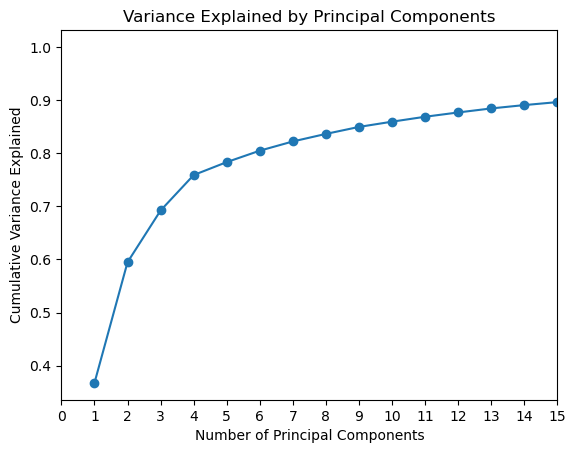

In [23]:
# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot variance explained ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.xlim(0, 15)  # Set x-axis limits
plt.xticks(np.arange(0, 16, 1))  # Set x-axis tick marks
plt.savefig('PLA_n_components.pdf')
plt.show()

C:\Users\moonk\AppData\Local\Temp\ipykernel_8424\3248877354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor_data['age'] = fulldata['age']


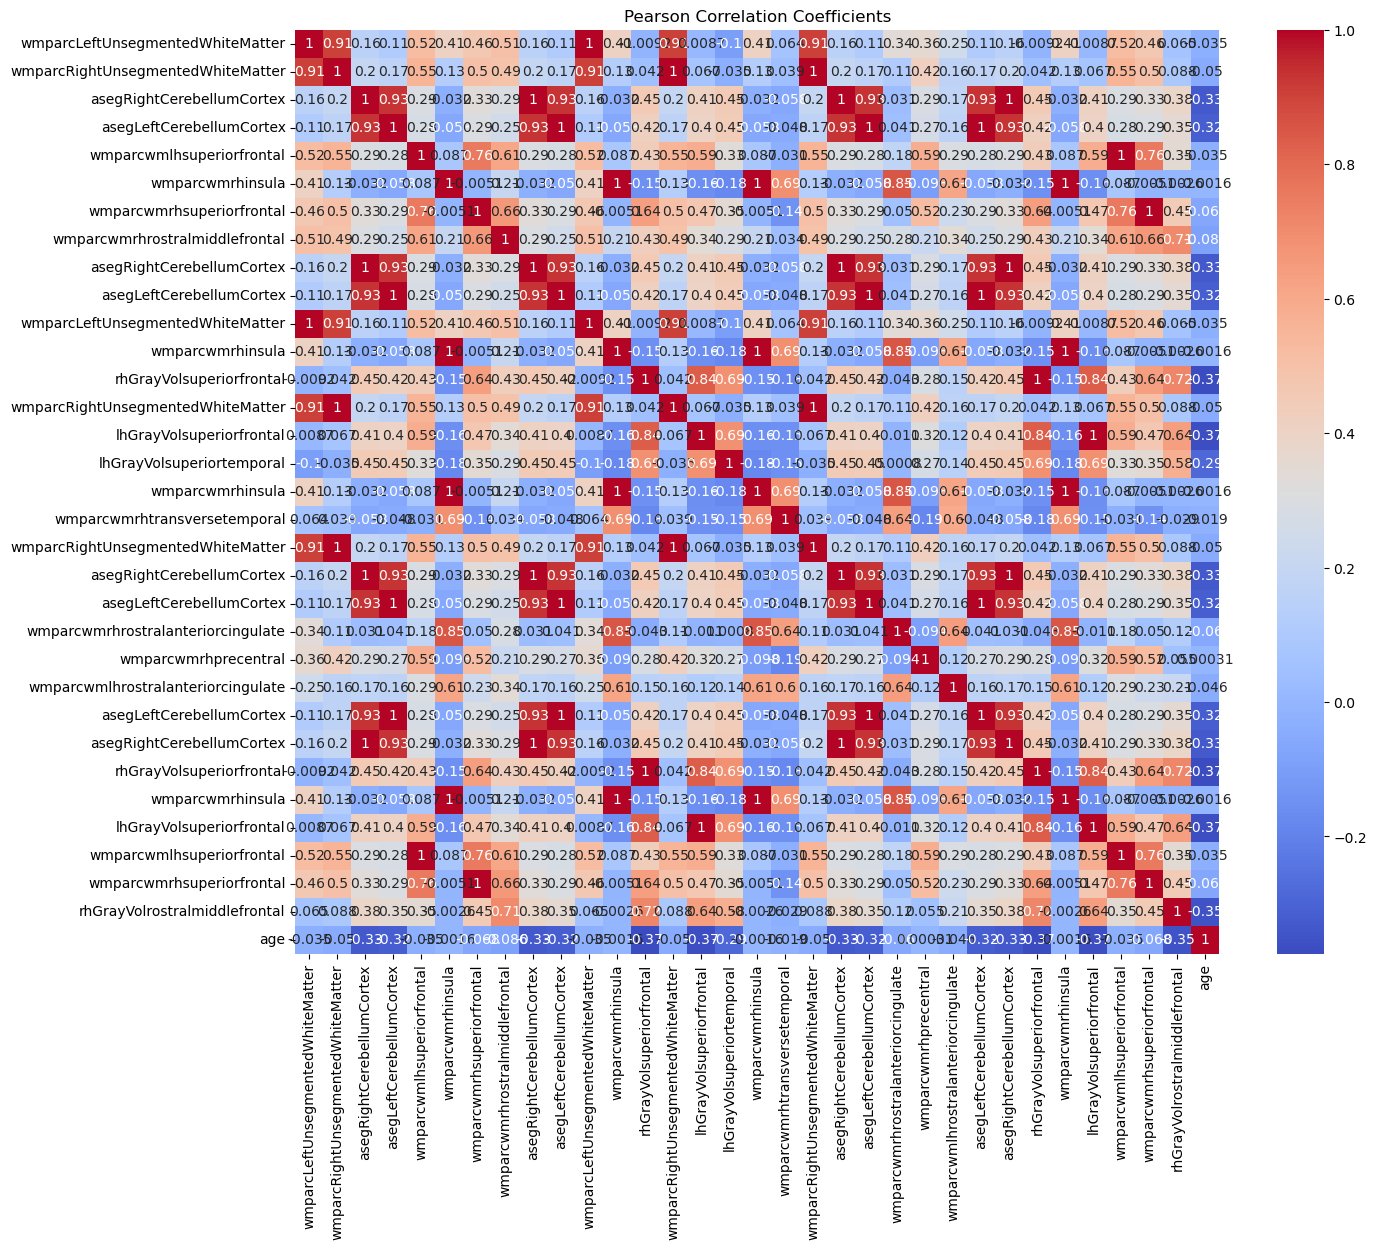

In [15]:
# Select the predictor columns
predictor_data = fulldata[predictors]

# Add the "age" column to predictor_data
predictor_data['age'] = fulldata['age']

# Calculate the Pearson correlation coefficients
correlation_matrix = predictor_data.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Pearson Correlation Coefficients')
plt.show()
